# What are the most optimal skills to learn for Data Analysts?
#### Methodology
1. Import the required libraries and dataset.
2. Clean the dataset.
3. Focus the analysis on job postings in India with the job title "Data Analyst."
4. Group skills by count and median salary, sorting by the highest count.
5. Calculate the percentage representation of each skill in job postings
6. Plot the findings.

### Import Required Libraries for Analysis
This code imports libraries for data analysis and visualization. `pandas` handles structured data, `matplotlib` and `seaborn` create visualizations, and `ast` analyzes Python code structures. `datasets` likely accesses pre-built datasets for machine learning or analysis.

In [ ]:
import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from adjustText import adjust_text 

### Import Dataset
This code loads a dataset from the `datasets` library (Hugging Face's). The `load_dataset` function fetches the `'lukebarousse/data_jobs'` dataset. The 'train' split of the dataset is then converted into a pandas DataFrame for easier data manipulation and analysis.

In [2]:
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() 

### Data Cleanup
The `pd.to_datetime()` function is used to convert the `job_posted_date` column into a datetime format.

The `new_list` function checks if a value in `job_skills` is not null, and if so, uses `ast.literal_eval() `to safely evaluate the string as a Python literal (i.e., converting it from a string representation of a list to an actual list). This transformation is applied to the `job_skills` column using `.apply()`.

In [3]:
#Converted the datatype for job_posted_date from object to datetime
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

#Coverted the datatype for skill_list from string to list
def new_list(skill_list):  
   if pd.notna(skill_list): 
      return ast.literal_eval(skill_list)  
df['job_skills'] = df.job_skills.apply(new_list)

### Filter df_India dataset for only job_country as India and job_title_short as Data Analyst
This code filters the dataset `df` to create a new DataFrame, `df_India`, that contains only the rows where the `job_country` column is equal to `'India'` and rows where `job_title_short` column  is equal to `'Data Analyst'`. It essentially extracts all job postings in the dataset that are associated with India

In [4]:
df_India = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')].copy()

### Cleaning and Exploding Job Skills for Data Analyst Jobs
This code cleans the `df_India` dataframe by removing rows with missing values in the `salary_year_avg` column, ensuring that only valid salary data remains. It then explodes the `job_skills` column, which contains lists of skills, into individual rows so that each skill is represented separately for every Data Analyst job posting. This makes it easier to analyze the skills associated with each job.

In [5]:
df_India_DA = df_India.dropna(subset=['salary_year_avg'])
df_India_DA = df_India_DA.explode('job_skills')

### Top 10 Job Skills for Data Analysts by Count and Median Salary
This code groups the `df_India_DA` dataframe by job_skills and calculates the count of job postings (`count`) and the median salary (`median`) for each skill. It then sorts the skills by the count of job postings in descending order. The total number of Data Analyst job postings (`DA_job_count`) is computed, and a new column, `percent`, is added to show the percentage of total job postings for each skill. Finally, it selects the top 10 skills based on the count of job postings. The resulting `India_skill_DA` dataframe provides a summary of the most common and highest-paying skills for Data Analysts in India.

In [6]:
India_skill_DA = df_India_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
India_skill_DA = India_skill_DA.sort_values(by='count', ascending=False)
DA_job_count = len(df_India_DA)
India_skill_DA['percent'] = India_skill_DA['count'] / DA_job_count * 100
India_skill_DA = India_skill_DA.head(10)
India_skill_DA

,count,median,percent
job_skills,,,
sql,46,96050.0,11.246944
excel,39,98500.0,9.535452
python,36,96050.0,8.801956
tableau,20,108087.5,4.889976
r,18,79200.0,4.400978
power bi,17,111175.0,4.156479
azure,15,93600.0,3.667482
aws,12,79200.0,2.933985
oracle,11,79200.0,2.689487


### Scatter Plot of Median Salary vs. Skill Count for Data Analyst Jobs
This code generates a scatter plot to visualize the relationship between the count of job postings and the median salary for the top 10 skills in Data Analyst roles in India. The plot shows the percentage of job postings on the x-axis and the median salary on the y-axis, with salary values formatted in thousands (e.g., $50k). Descriptive titles and axis labels are added for context, and a grid is included for readability. Text labels identify the skills corresponding to each point on the plot, with the `adjust_text` function used to prevent label overlap. Finally, `plt.tight_layout()` ensures proper spacing of the plot and labels for clear visualization.

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


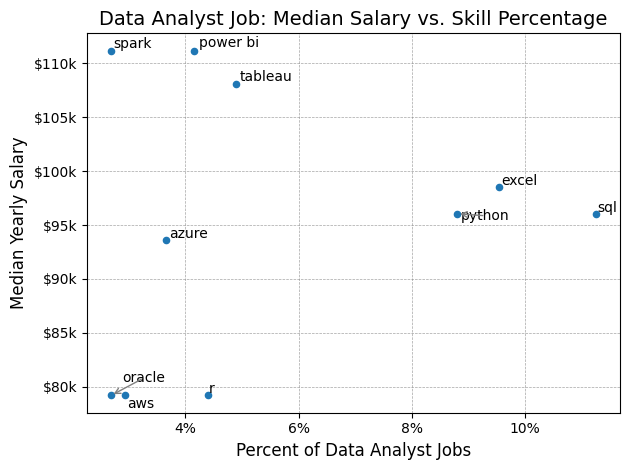

In [7]:
from matplotlib.ticker import PercentFormatter

# Plot the scatter plot
India_skill_DA.plot(kind='scatter', x='percent', y='median')

# Add descriptive title and labels
plt.title('Data Analyst Job: Median Salary vs. Skill Percentage', fontsize=14)
plt.ylabel('Median Yearly Salary', fontsize=12)
plt.xlabel('Percent of Data Analyst Jobs', fontsize=12)

# Customize y-axis labels to display salary in thousands
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust skill labels
texts = []
for i, txt in enumerate(India_skill_DA.index):
    texts.append(plt.text(India_skill_DA['percent'].iloc[i], India_skill_DA['median'].iloc[i], txt, fontsize=10))

# Use adjust_text to avoid overlapping labels
adjust_text(
    texts, 
    arrowprops=dict(arrowstyle='->', color='gray'), 
    force_text=(0.5, 1), 
    expand_text=(1.2, 1.4),
    force_points=(0.3, 0.8)
)

plt.tight_layout()
plt.show()
